In [1]:
import pymaid
import navis
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import scikit_posthocs as sp
from statannot import add_stat_annotation

from matplotlib.ticker import PercentFormatter

In [2]:
#connect your catmaid instance
instance=pymaid.CatmaidInstance('https://radagast.hms.harvard.edu/catmaidaedes',"")

INFO  : Global CATMAID instance set. Caching is ON. (pymaid)


In [3]:
#initialize an empty dataframe
glomcontrol=pd.DataFrame(columns=['glomerulus','id', 'path length in glom', 'total recurrent connections', 'recurrent connections in glom', 'recurrent connections density'])


In [4]:
#fetch a group of neurons
MD1OSNs = pymaid.get_skids_by_annotation(['innervates MD1', 'left palp nerve', 'sensory neuron', 'PSPs done'], allow_partial = False, intersect = True)
MD1neurons = pymaid.get_neuron(MD1OSNs)

Fetch neurons:   0%|          | 0/11 [00:00<?, ?it/s]

Make nrn:   0%|          | 0/11 [00:00<?, ?it/s]

In [ ]:
for n in MD1neurons:
    skeletonid=n.skeleton_id
    skelid=int(skeletonid)
    labels = pymaid.get_label_list()
    neuronlabels=labels[labels.skeleton_id==skelid]
    branchpoint=neuronlabels[neuronlabels.tag=='first branch point']

    if len(branchpoint) !=1:
        print('error, neuron skelid=%i does not have exactly 1 branchpoint tag'% skelid)
    else: bpnode=branchpoint.node_id.values[0]

    #cut the neuron
    dist,prox=navis.cut_skeleton(n, bpnode)
    dlength=dist.cable_length
    plength=prox.cable_length
    print(dlength)
    #pymaid.clear_cache()

    #get connectivity from OSNs to PN in volume
    connectivity = pymaid.adjacency_matrix(n, targets=MD1neurons)
    glom_connectivity=pymaid.filter_connectivity(connectivity, restrict_to='MD1 04/06/21')
    connect= list(connectivity.loc[int(n.id),:])
    sumconnect = sum(connect)
    glomconnect=list(glom_connectivity.loc[n.id,:])
    sumglomconnect=sum(glomconnect)

    #divide connectivity by length within glomerulus
    control= sumglomconnect/dlength
    glomcontrol=glomcontrol.append({'glomerulus': 'md1', 'id':int(n.id),'path length in glom':dlength, 'total recurrent connections':sumconnect, 'recurrent connections in glom':sumglomconnect, 'recurrent connections density':control}, ignore_index=True)

In [ ]:
print(glomcontrol)

   glomerulus      id  path length in glom total recurrent connections  \
0         md1    7172          453680.4375                         103   
1         md1    7815          406781.8125                          55   
2         md1    1608          434659.9375                          55   
3         md1     873          569447.6250                          71   
4         md1    6736          445835.0000                          60   
5         md1     881          506129.0000                          85   
6         md1    6975          391274.0625                          87   
7         md1  324409          416095.0000                          80   
8         md1     953          529873.4375                          80   
9         md1    5021          284710.3750                          42   
10        md1     671          629597.1250                          82   

    recurrent connections in glom  recurrent connections density  
0                           103.0           

In [ ]:
#fetch a group of neurons
MD2OSNs = pymaid.get_skids_by_annotation(['innervates MD2', 'left palp nerve', 'sensory neuron', 'PSPs done'], allow_partial = False, intersect = True)
MD2neurons = pymaid.get_neuron(MD2OSNs)

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


Fetch neurons:   0%|          | 0/10 [00:00<?, ?it/s]

Make nrn:   0%|          | 0/10 [00:00<?, ?it/s]

In [ ]:
for n in MD2neurons:
    skeletonid=n.skeleton_id
    skelid=int(skeletonid)
    labels = pymaid.get_label_list()
    neuronlabels=labels[labels.skeleton_id==skelid]
    branchpoint=neuronlabels[neuronlabels.tag=='first branch point']

    if len(branchpoint) !=1:
        print('error, neuron skelid=%i does not have exactly 1 branchpoint tag'% skelid)
    else: bpnode=branchpoint.node_id.values[0]

    #cut the neuron
    dist,prox=navis.cut_skeleton(n, bpnode)
    dlength=dist.cable_length
    plength=prox.cable_length
    print(dlength)
    #pymaid.clear_cache()

    #get connectivity from OSNs to PN in volume
    connectivity = pymaid.adjacency_matrix(n, targets=MD2neurons)
    glom_connectivity=pymaid.filter_connectivity(connectivity, restrict_to=MD2neurons)
    connect= list(connectivity.loc[int(n.id),:])
    sumconnect = sum(connect)
    glomconnect=list(glom_connectivity.loc[n.id,:])
    sumglomconnect=sum(glomconnect)

    #divide connectivity by length within glomerulus
    control= sumglomconnect/dlength
    glomcontrol=glomcontrol.append({'glomerulus': 'md2', 'id':int(n.id),'path length in glom':dlength, 'total recurrent connections':sumconnect, 'recurrent connections in glom':sumglomconnect, 'recurrent connections density':control}, ignore_index=True)

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


204651.9


Regenerating:   0%|          | 0/6 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


141502.66


Regenerating:   0%|          | 0/5 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


138635.31


Regenerating:   0%|          | 0/5 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


152818.12


Regenerating:   0%|          | 0/3 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


167905.39


Regenerating:   0%|          | 0/5 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


140428.69


Regenerating:   0%|          | 0/6 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


102887.84


Regenerating:   0%|          | 0/6 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


195558.47


Regenerating:   0%|          | 0/4 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


164012.03


Regenerating:   0%|          | 0/8 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


167272.22


Regenerating:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
#fetch a group of neurons
MD3OSNs = pymaid.get_skids_by_annotation(['innervates MD3', 'left palp nerve', 'sensory neuron', 'PSPs done'], allow_partial = False, intersect = True)
MD3neurons = pymaid.get_neuron(MD3OSNs)

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


Fetch neurons:   0%|          | 0/10 [00:00<?, ?it/s]

Make nrn:   0%|          | 0/10 [00:00<?, ?it/s]

In [ ]:
for n in MD3neurons:
    skeletonid=n.skeleton_id
    skelid=int(skeletonid)
    labels = pymaid.get_label_list()
    neuronlabels=labels[labels.skeleton_id==skelid]
    branchpoint=neuronlabels[neuronlabels.tag=='first branch point']

    if len(branchpoint) !=1:
        print('error, neuron skelid=%i does not have exactly 1 branchpoint tag'% skelid)
    else: bpnode=branchpoint.node_id.values[0]

    #cut the neuron
    dist,prox=navis.cut_skeleton(n, bpnode)
    dlength=dist.cable_length
    plength=prox.cable_length
    print(dlength)
    #pymaid.clear_cache()

    #get connectivity from OSNs to PN in volume
    connectivity = pymaid.adjacency_matrix(n, targets=MD3neurons)
    glom_connectivity=pymaid.filter_connectivity(connectivity, restrict_to=MD3neurons)
    connect= list(connectivity.loc[int(n.id),:])
    sumconnect = sum(connect)
    glomconnect=list(glom_connectivity.loc[n.id,:])
    sumglomconnect=sum(glomconnect)

    #divide connectivity by length within glomerulus
    control= sumglomconnect/dlength
    glomcontrol=glomcontrol.append({'glomerulus':'md3','id':int(n.id),'path length in glom':dlength, 'total recurrent connections':sumconnect, 'recurrent connections in glom':sumglomconnect, 'recurrent connections density':control}, ignore_index=True)

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


170986.05


Regenerating:   0%|          | 0/7 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


150195.02


Regenerating:   0%|          | 0/9 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


156733.62


Regenerating:   0%|          | 0/6 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


188369.67


Regenerating:   0%|          | 0/8 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


133558.53


Regenerating:   0%|          | 0/7 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


138479.78


Regenerating:   0%|          | 0/4 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


108313.91


Regenerating:   0%|          | 0/7 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


144738.6


Regenerating:   0%|          | 0/6 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


107448.98


Regenerating:   0%|          | 0/8 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


123889.97


Regenerating:   0%|          | 0/7 [00:00<?, ?it/s]

In [ ]:
df=glomcontrol

md1=df[df["glomerulus"]=="md1"]
md2=df[df["glomerulus"]=="md2"]
md3=df[df['glomerulus']=="md3"]
md2.head()

,glomerulus,id,path length in glom,total recurrent connections,recurrent connections in glom,recurrent connections density
11,md2,9064,204651.906250,10,10.0,0.000049
12,md2,7209,141502.656250,15,15.0,0.000106
13,md2,718,138635.312500,16,16.0,0.000115
14,md2,7983,152818.125000,9,9.0,0.000059
15,md2,947,167905.390625,16,16.0,0.000095


In [ ]:
#make lists like a noob
md1_recurrent_inglom=md1["recurrent connections in glom"].values.tolist()
#md1_recurrent_inglom_total=list(np.concatenate(md1_recurrent_inglom))

md2_recurrent_inglom=md2["recurrent connections in glom"].values.tolist()
#md2_recurrent_inglom=list(np.concatenate(md2_recurrent_inglom))

md3_recurrent_inglom=md3["recurrent connections in glom"].values.tolist()
#md3_recurrent_inglom=list(np.concatenate(md3_recurrent_inglom))

print(md1_recurrent_inglom)

[103.0, 55.0, 53.0, 70.0, 58.0, 81.0, 87.0, 80.0, 76.0, 41.0, 75.0]


In [ ]:
data_dict = {"1": md1_recurrent_inglom, "2": md2_recurrent_inglom, "3": md3_recurrent_inglom}
pre_df = {"Glomerulus": [], "OSN → OSN synapses in glomerulus": []}
for glom, dists in data_dict.items():
    glom_list = [glom,]*len(dists)
    pre_df["Glomerulus"].extend(glom_list)    
    pre_df["OSN → OSN synapses in glomerulus"].extend(dists)

df = pd.DataFrame.from_dict(pre_df)
df

,Glomerulus,OSN → OSN synapses in glomerulus
0,1,103.0
1,1,55.0
2,1,53.0
3,1,70.0
4,1,58.0
5,1,81.0
6,1,87.0
7,1,80.0
8,1,76.0
9,1,41.0


In [ ]:
from seaborn.categorical import _ViolinPlotter
class MyVPlot(_ViolinPlotter):
    def draw_quartiles(self, ax, data, support, density, center, split=False, color='k'):
        """Draw the quartiles as lines at width of density."""
        q50 = np.mean(data)
        self.draw_to_density(ax, center, q50, support, density, split,
                             linewidth=self.linewidth, color=color)

def my_violinplot2(x=None, y=None, hue=None, data=None, order=None, hue_order=None,
                  bw="scott", cut=0, scale="area", scale_hue=True, gridsize=100,
                  width=.8, inner="quartiles", split=False, dodge=True, orient=None,
                  linewidth=None, color=None, palette=None, saturation=.75,alpha=1,
                  ax=None, edgecolor=None, **kwargs):

    plotter = MyVPlot(x, y, hue, data, order, hue_order,
                      bw, cut, scale, scale_hue, gridsize,
                      width, inner, split, dodge, orient, linewidth,
                      color, palette, saturation)
    if ax is None:
        ax = plt.gca()

    plotter.plot(ax)
    # change outlines
    colors=["violet", "#0000FF", 'mediumspringgreen']
    for idx, violin in enumerate(ax.collections):
        violin.set_edgecolor(colors[idx])
    for l in ax.lines:
        l.set_linestyle('-')
        l.set_color('k')
    return ax

/tmp/ipykernel_42746/4152694252.py:6: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  ax = sns.stripplot(data=df, x=x, y=y, order=order, palette=["violet", "#0000FF", "mediumspringgreen"])


1 v.s. 2: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.631e-04 U_stat=1.100e+02
2 v.s. 3: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=6.184e-03 U_stat=9.000e+00
1 v.s. 3: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.687e-04 U_stat=1.100e+02


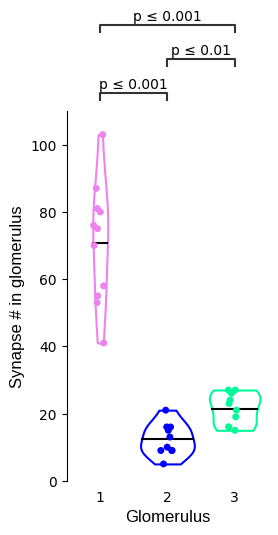

In [ ]:
#make plot with annotations, from dataframe
x = "Glomerulus"
y = "OSN → OSN synapses in glomerulus"
order = ['1', '2', '3']
ax = my_violinplot2(data=df, x=x, y=y, order=order, color="1")
ax = sns.stripplot(data=df, x=x, y=y, order=order, palette=["violet", "#0000FF", "mediumspringgreen"])
ax.set_xlabel('Glomerulus', size=12, fontname="Liberation Sans")
ax.set_ylabel('Synapse # in glomerulus', size=12, fontname="Liberation Sans")
ax.set_aspect(0.05)
plt.ylim(0,110)
plt.tick_params(axis='x', which='both', bottom=False, top=False)
plt.tick_params(axis='y', which='both', left=True, right=False)
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=True, offset=None, trim=False)
add_stat_annotation(ax, data=df, x=x, y=y, order=order,
                    box_pairs=[("1", "2"), ("1", "3"), ("2", "3")],
                    test='Mann-Whitney', text_format='simple', loc='outside', verbose=2)
plt.savefig('/home/jb534/pymaid_scripts/aedes/aedes/svg/recurrent_inglom.svg', format="svg")
plt.show()

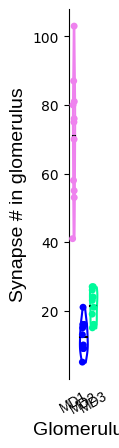

In [ ]:
ax = my_violinplot2(data=[md1_recurrent_inglom, md2_recurrent_inglom, md3_recurrent_inglom], color="1")
ax = sns.stripplot(data=[md1_recurrent_inglom, md2_recurrent_inglom, md3_recurrent_inglom], palette=["violet", "#0000FF", "mediumspringgreen"])
labels = ['MD1', 'MD2', 'MD3']
ax.set_ylabel('Synapse # in glomerulus', size=14, fontname="Liberation Sans")
ax.set_xlabel('Glomerulus', size=14, fontname="Liberation Sans")
ax.set_aspect(0.35)
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=True, offset=None, trim=False)
ax.set_xticklabels(labels,rotation = 30, fontname="Liberation Sans")
plt.tick_params(axis='x', which='both', bottom=False, top=False)
plt.tick_params(axis='y', which='both', left=True, right=False)

plt.savefig('/home/jb534/pymaid_scripts/aedes/aedes/svg/recurrentinglom.svg', format="svg")

In [ ]:
#kruskal-wallis test
stats.kruskal(md1_recurrent_inglom, md2_recurrent_inglom, md3_recurrent_inglom)

KruskalResult(statistic=24.776856160226593, pvalue=4.166525511602824e-06)

In [ ]:
#posthocs
sp.posthoc_dunn([md1_recurrent_inglom, md2_recurrent_inglom, md3_recurrent_inglom], p_adjust = 'bonferroni')

,1,2,3
1,1.000000,0.000002,0.012138
2,0.000002,1.000000,0.130110
3,0.012138,0.130110,1.000000


In [ ]:
#make lists like a noob
md1_recurrent_density=md1["recurrent connections density"].values.tolist()
md2_recurrent_density=md2["recurrent connections density"].values.tolist()
md3_recurrent_density=md3["recurrent connections density"].values.tolist()

#put them in a dataframe

In [ ]:
data_dict = {"1": md1_recurrent_density, "2": md2_recurrent_density, "3": md3_recurrent_density}
pre_df = {"Glomerulus": [], "OSN → OSN synapses density (synapses/µm)": []}
for glom, dists in data_dict.items():
    glom_list = [glom,]*len(dists)
    pre_df["Glomerulus"].extend(glom_list)    
    pre_df["OSN → OSN synapses density (synapses/µm)"].extend(dists)

df = pd.DataFrame.from_dict(pre_df)
df

,Glomerulus,OSN → OSN synapses density (synapses/µm)
0,1,0.000227
1,1,0.000135
2,1,0.000122
3,1,0.000123
4,1,0.000130
5,1,0.000160
6,1,0.000222
7,1,0.000192
8,1,0.000143
9,1,0.000144


/tmp/ipykernel_42746/2251533398.py:6: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  ax = sns.stripplot(data=df, x=x, y=y, order=order, palette=["violet", "#0000FF", "mediumspringgreen"])


1 v.s. 2: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=8.618e-04 U_stat=1.070e+02
2 v.s. 3: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=5.119e-03 U_stat=8.000e+00
1 v.s. 3: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=6.100e+01


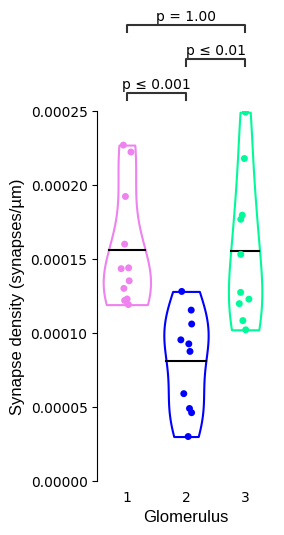

In [ ]:
#make plot with annotations, from dataframe
x = "Glomerulus"
y = "OSN → OSN synapses density (synapses/µm)"
order = ['1', '2', '3']
ax = my_violinplot2(data=df, x=x, y=y, order=order, color="1")
ax = sns.stripplot(data=df, x=x, y=y, order=order, palette=["violet", "#0000FF", "mediumspringgreen"])
ax.set_xlabel('Glomerulus', size=12, fontname="Liberation Sans")
ax.set_ylabel('Synapse density (synapses/µm)', size=12, fontname="Liberation Sans")
ax.set_aspect(25000)
plt.ylim(0,0.00025)
plt.tick_params(axis='x', which='both', bottom=False, top=False)
plt.tick_params(axis='y', which='both', left=True, right=False)
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=True, offset=None, trim=False)
add_stat_annotation(ax, data=df, x=x, y=y, order=order,
                    box_pairs=[("1", "2"), ("1", "3"), ("2", "3")],
                    test='Mann-Whitney', text_format='simple', loc='outside', verbose=2)
plt.savefig('/home/jb534/pymaid_scripts/aedes/aedes/svg/recurrentdensity.svg', format="svg")
plt.show()

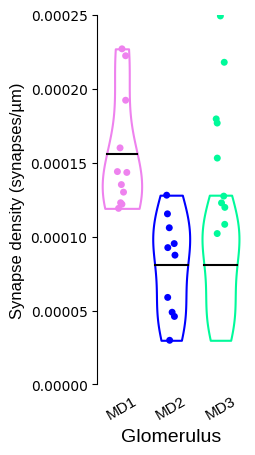

In [ ]:
ax = my_violinplot2(data=[md1_recurrent_density, md2_recurrent_density, md2_recurrent_density], color="1")
ax = sns.stripplot(data=[md1_recurrent_density, md2_recurrent_density, md3_recurrent_density], palette=["violet", "#0000FF", "mediumspringgreen"])
labels = ['MD1', 'MD2', 'MD3']
ax.set_ylabel('Synapse density (synapses/µm)', size=12, fontname="Liberation Sans")
ax.set_xlabel('Glomerulus', size=14, fontname="Liberation Sans")
ax.set_aspect(30000)
plt.ylim(0,0.00025)
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=True, offset=None, trim=False)
ax.set_xticklabels(labels,rotation = 30, fontname="Liberation Sans", size=11)
plt.tick_params(axis='x', which='both', bottom=False, top=False)
plt.tick_params(axis='y', which='both', left=True, right=False)

plt.savefig('/home/jb534/pymaid_scripts/aedes/svg/feedforwardinglom_density.svg', format="svg")

In [ ]:
stats.kruskal(md1_recurrent_density, md2_recurrent_density, md3_recurrent_density)


KruskalResult(statistic=15.955865102639308, pvalue=0.00034294771688632116)

In [ ]:
#posthocs
sp.posthoc_dunn([md1_recurrent_density, md2_recurrent_density, md3_recurrent_density], p_adjust = 'bonferroni')

,1,2,3
1,1.000000,0.000664,1.000000
2,0.000664,1.000000,0.004164
3,1.000000,0.004164,1.000000
